'\n綺麗に線形回帰にデータが乗っている\n'

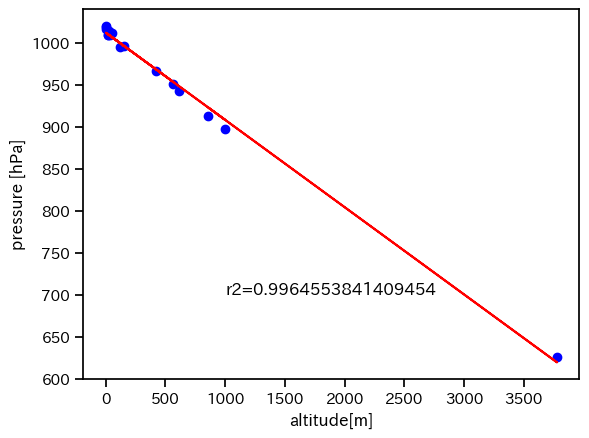

In [144]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import japanize_matplotlib
%matplotlib inline

#データ
df_temp = pd.read_csv('csv/temp_pressure.csv')

#学習
lr = LinearRegression()
X = df_temp[['altitude']].values # 標高データ
y = df_temp[['pressure']].values # 気圧データ
lr.fit(X, y)

#可視化
plt.scatter(X, y, color='b')
plt.plot(X, lr.predict(X), color='r')
plt.xlabel('altitude[m]')
plt.ylabel('pressure [hPa]')
plt.text(1000, 700, f'r2={r2_score(y, lr.predict(X))}') #決定係数

"""
綺麗に線形回帰にデータが乗っている
"""

## 多次元の説明変数

In [145]:
"""
説明変数 = 標高(altitude)
目的変数 = 気温(tempature)
だとどうなるのか？？
"""

'\n説明変数 = 標高(altitude)\n目的変数 = 気温(tempature)\nだとどうなるのか？？\n'

'\nうまく線形回帰できていない\n説明変数を標高ではなく緯度で処理してみると\n'

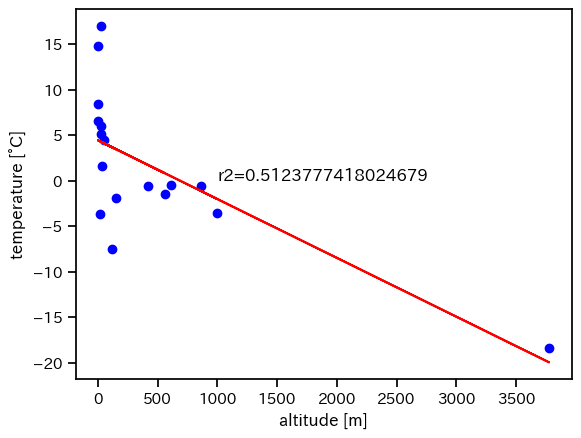

In [146]:
X = df_temp[['altitude']].values  # 説明変数(標高)
y = df_temp[['temperature']].values  # 目的変数(気温)
lr.fit(X, y)
plt.scatter(X, y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('altitude [m]')
plt.ylabel('temperature [°C]')
plt.text(1000, 0, f'r2={r2_score(y, lr.predict(X))}') 

"""
うまく線形回帰できていない
説明変数を標高ではなく緯度で処理してみると
"""

'\n北緯36度くらいのデータの精度がイマイチ（日本アルプスのように標高の高い地域が多いため）\n次に精度を確かめてみる\n'

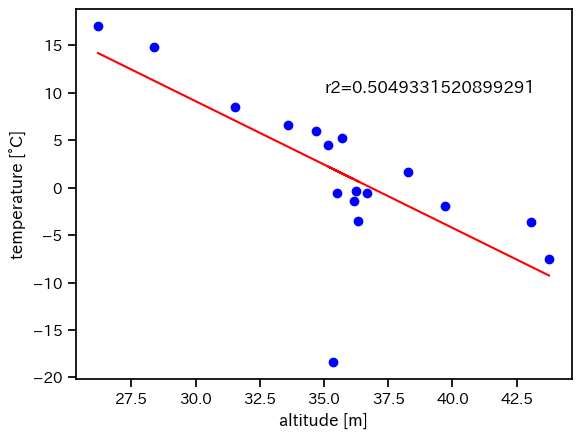

In [147]:
X = df_temp[['latitude']].values  # 説明変数(緯度)
y = df_temp[['temperature']].values  # 目的変数(気温)
lr.fit(X, y)
plt.scatter(X, y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('altitude [m]')
plt.ylabel('temperature [°C]')
plt.text(35, 10, f'r2={r2_score(y, lr.predict(X))}') 

"""
北緯36度くらいのデータの精度がイマイチ（日本アルプスのように標高の高い地域が多いため）
次に精度を確かめてみる
"""

'\n精度が良ければ線形回帰に乗っているが、外れているデータがある。\n次に"標高", "緯度","気温"の2つの説明変数を使うと精度が上がるのでは？\n\n'

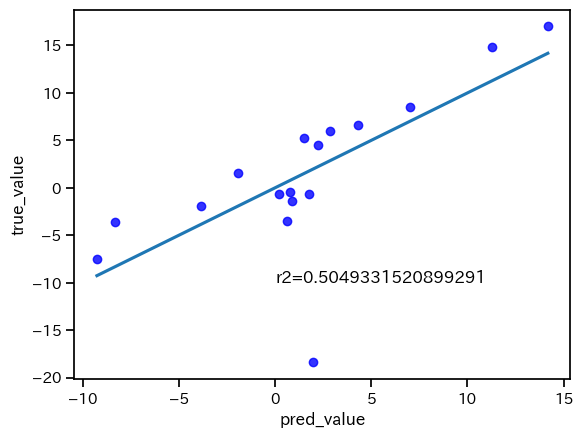

In [148]:
import seaborn as sns

#予測値と目的変数のプロット
sns.regplot(x=lr.predict(X), y=y, ci=0, scatter_kws={'color':'blue'})
plt.xlabel('pred_value')  # 予測値
plt.ylabel('true_value')  # 実測値
plt.text(0, -10, f'r2={r2_score(y, lr.predict(X))}')  # R2乗値を表示

"""
精度が良ければ線形回帰に乗っているが、外れているデータがある。
次に"標高", "緯度","気温"の2つの説明変数を使うと精度が上がるのでは？

"""


Text(0.5, 0, 'temperature[℃]')

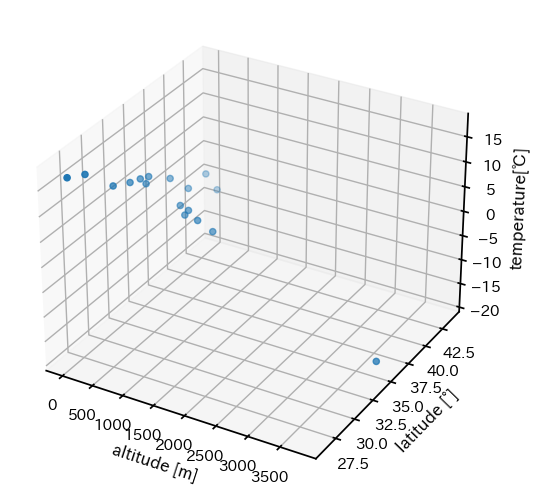

In [150]:
from mpl_toolkits.mplot3d import Axes3D

#説明変数、目的変数
X = df_temp[['altitude', 'latitude']]
y = df_temp['temperature']

fig = plt.figure()
ax = Axes3D(fig,  auto_add_to_figure=False)
fig.add_axes(ax)

#x軸、y軸、z軸
ax.scatter3D(X['altitude'], X['latitude'], y)
ax.set_xlabel('altitude [m]')
ax.set_ylabel('latitude [°]')
ax.set_zlabel('temperature[℃]')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, -10, 'r2=0.9882146530719522')

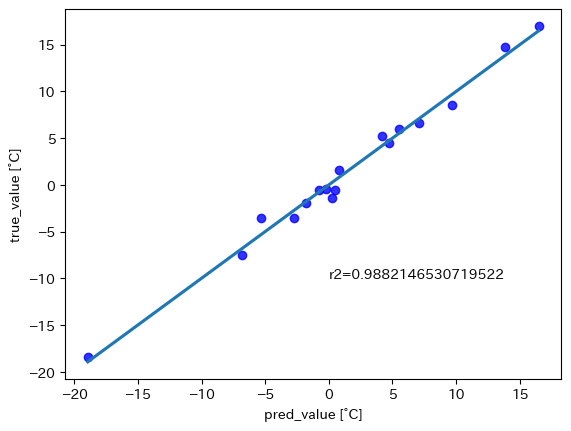

In [17]:
lr.fit(X, y) #Xは'altitude', 'latitude'の2特徴量
sns.regplot(lr.predict(X), y, ci=0, scatter_kws={'color':'blue'})
plt.xlabel('pred_value [°C]')
plt.ylabel('true_value [°C]')
plt.text(0, -10, f'r2={r2_score(y, lr.predict(X))}')

"""
多次元の説明変数で予想精度が向上した。
※可視化難易度や次元の呪いは気を付ける

"""

## 非線形

In [18]:
df_animal = pd.read_csv('csv/animal_size.csv')

In [20]:
df_animal.head()

,name,body_length,weight
0,Mara,72,12
1,Lion,210,200
2,Hyena,150,70
3,Eland,295,650
4,Wolf,115,35


Text(0, 0.5, 'weight [kg]')

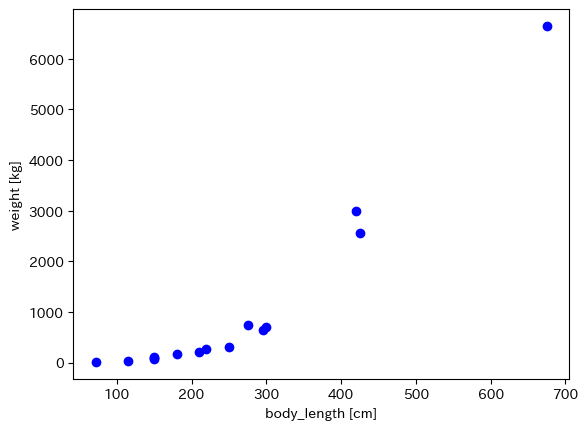

In [75]:
X = df_animal[['body_length']].values
y = df_animal[['weight']].values

#散布図
plt.scatter(X, y, color='b')
plt.xlabel('body_length [cm]')
plt.ylabel('weight [kg]')

In [76]:
#外れ値？
df_animal[df_animal['body_length'] > 400 ].sort_values(by='weight').iloc[0, :]

name           Rhinoceros
body_length           425
weight               2550
Name: 11, dtype: object

'\n線形で無理やり回帰しているので、イマイチなフィッティング\n\n体重(体積)は体長の3乗に比例するので3次式で回帰すれば良い？\n\n多項式回帰の方法には、scikit-learnを使う方法や、scipy.optimizeを使う方法があるが、\n今回は3乗以外の係数を無視するのでscipy.optimizeを使用\n\n'

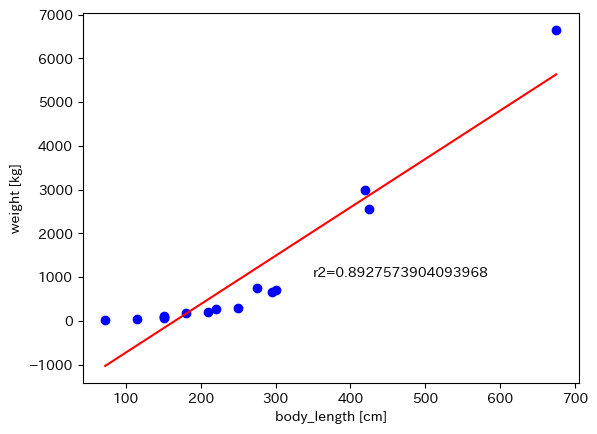

In [87]:
df_animal = df_animal[df_animal['name'] != 'Giraffe'] #キリン除外
df_animal = df_animal.sort_values('body_length')

#学習
X = df_animal[['body_length']].values
y = df_animal[['weight']].values
lr.fit(X, y)

#可視化
plt.scatter(X, y, color='b')
plt.plot(X, lr.predict(X), color='r')
plt.xlabel('body_length [cm]')
plt.ylabel('weight [kg]')
plt.text(350, 1000, f'r2={r2_score(y, lr.predict(X))}') 

"""
線形で無理やり回帰しているので、イマイチなフィッティング

体重(体積)は体長の3乗に比例するので3次式で回帰すれば良い？

多項式回帰の方法には、scikit-learnを使う方法や、scipy.optimizeを使う方法があるが、
今回は3乗以外の係数を無視するのでscipy.optimizeを使用

"""

Text(400, 1000, 'r2=0.9436403153398104')

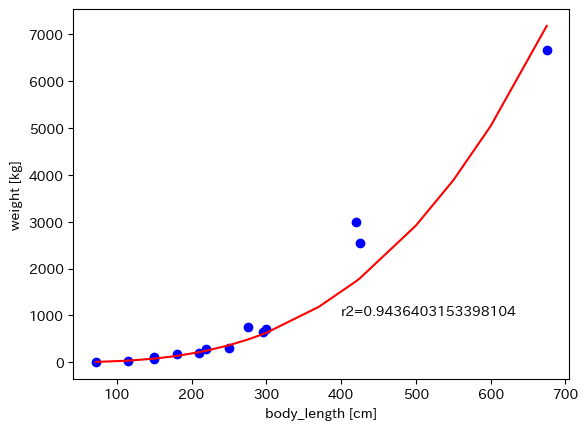

In [96]:
from scipy.optimize import curve_fit

def cubic_fit(x, a):
    Y = a * x **3
    return Y

#パラメータの推定
#popt:最適なパラメータ値(a値)
#pcov:パラメータの共分散
popt, pcov = curve_fit(cubic_fit, X[:, 0], y[:, 0])

#データの散布図
plt.scatter(X, y, color = 'b')

pred_y = cubic_fit(X, popt[0]) #予測値
X_add = np.sort(np.vstack((X, np.array([[370], [500], [550], [600]]))), axis=0) # 線形が滑らかになるように
pred_y_add = cubic_fit(X_add, popt[0])

plt.plot(X_add, pred_y_add, color = 'r')
plt.xlabel('body_length [cm]')  # x軸のラベル
plt.ylabel('weight [kg]')  # y軸のラベル
plt.text(400, 1000, f'r2={r2_score(y, pred_y)}')  # R2乗値を表示


"""
3次式で非線形回帰にしたことで、推定性能が向上
今回、物理法則に基づいて3次式にしたが、実際はわからない

機械学習アルゴリズムは非線形のフィッティングを「実データに合わせて」、「柔軟に」実現してくれる。
 ->SVMのカーネルトリック
 https://qiita.com/c60evaporator/items/8864f7c1384a3c6e9bd9#%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E3%83%88%E3%83%AA%E3%83%83%E3%82%AF%E3%81%A8%E3%81%AF

"""

## 3.1 サポートベクターマシン分類

In [ ]:
"""
SVM
多クラス分類
KFold
"""

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

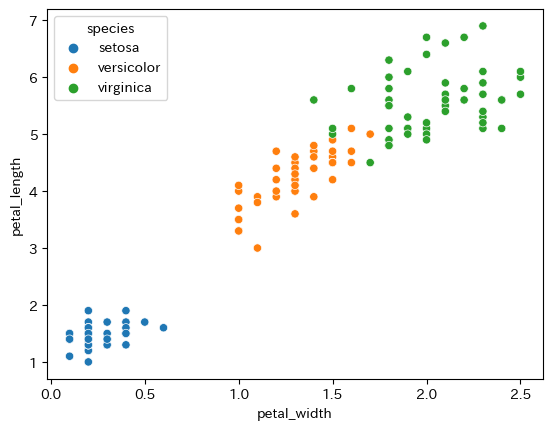

In [101]:
iris = sns.load_dataset('iris')
sns.scatterplot(x= 'petal_width', y='petal_length', data=iris, hue='species')

In [181]:
from seaborn_analyzer import classplot
from sklearn.svm import SVC
from sklearn.model_selection import KFold

#モデル(チューニング前)
model = SVC() 
seed = 42

#3分割KFoldクロスバリデーション
cv = KFold(n_splits=3, shuffle=True, random_state=seed)

# classplot.class_separator_plot(model, ['petal_width', 'petal_length'], 'species', pre_iris, cv=cv, display_cv_indices=[0, 1, 2])

"""
matplotlibのバージョン問題？？

"""

'\nmatplotlibのバージョン問題？？\n\n'

In [158]:
pre_iris.dtypes

sepal_length     int64
sepal_width      int64
petal_length     int64
petal_width      int64
species         object
dtype: object

In [ ]:
#手順1 最大化したい評価指標の定義
"""
・多クラス分類
・不均衡データではない
->f1-macroを評価指標にする

"""

In [332]:
#チューニング前
from sklearn.model_selection import cross_val_score
import numpy as np

X = iris[['petal_width', 'petal_length']].values 
y = iris['species']
scoring = 'f1_macro'

scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
print(f'scores={scores}')
print(f'average_score={np.mean(scores)}')

scores=[1.         0.91666667 0.98198198]
average_score=0.9662162162162162


In [169]:
#gamma値の計算(デフォルの場合)　svmのページ参照
print(f'gamma = {1 /(X.shape[1] * X.var())}')

gamma = 0.14396727220794353


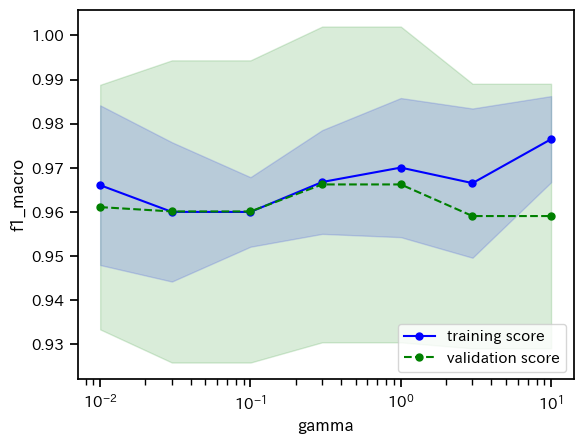

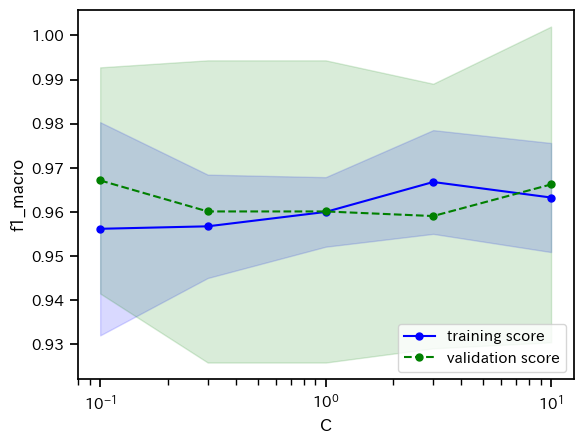

In [185]:
#パラメータ種類と範囲の選択
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
%matplotlib inline

cv_params = {'gamma':[0.01, 0.03, 0.1, 0.3, 1, 3, 10],
            'C': [0.1, 0.3, 1, 3, 10]}

for i, (k,v) in enumerate(cv_params.items()):
    
    #検証曲線
    train_scores, valid_scores = validation_curve(estimator=model, X=X, y=y, param_name=k, param_range=v, cv=cv, scoring=scoring, n_jobs=-1)
    
    
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    
     # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールを'log'に（線形なパラメータは'linear'にするので注意）
    plt.xscale('log')
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()
    
    """
    もっと細かくパラメータを設定
    
    """

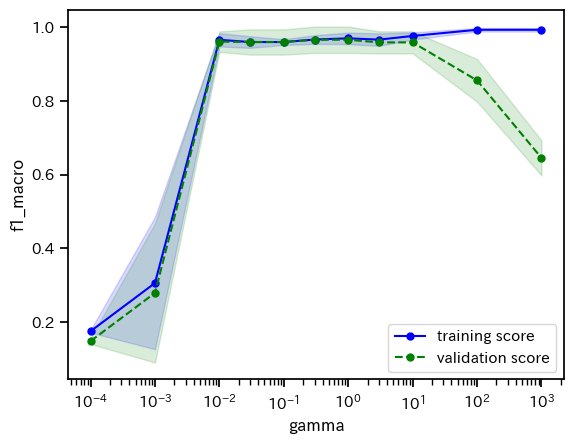

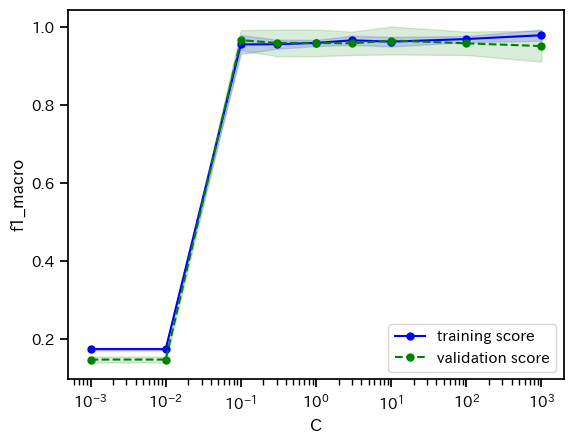

In [186]:
cv_params = {'gamma': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100, 1000],
             'C': [0.001, 0.01, 0.1, 0.3, 1, 3, 10, 100, 1000]}
# 検証曲線のプロット（パラメータ毎にプロット）
for i, (k, v) in enumerate(cv_params.items()):
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールを'log'に（線形なパラメータは'linear'にするので注意）
    plt.xscale('log')
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()

"""
調整範囲
パラメータ"gamma"：0.001～100
パラメータ"C"：0.01～100

"""

In [188]:
valid_scores

array([[0.15384615, 0.15384615, 0.13756614],
       [0.15384615, 0.15384615, 0.13756614],
       [1.        , 0.93743891, 0.96393762],
       [1.        , 0.91633987, 0.96393762],
       [1.        , 0.91633987, 0.96393762],
       [0.97849462, 0.91666667, 0.98198198],
       [1.        , 0.91666667, 0.98198198],
       [0.97849462, 0.91666667, 0.98198198],
       [0.97849462, 0.89556088, 0.98198198]])

## グリッドサーチ


In [263]:
from sklearn.model_selection import GridSearchCV

#上記で決めたパラメータ範囲
cv_params = {'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
             'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]}

gridcv = GridSearchCV(model, cv_params, cv=cv, scoring=scoring, n_jobs=-1)
gridcv.fit(X, y)

best_params = gridcv.best_params_
best_score = gridcv.best_score_
print(f'最適パラメータ{best_params}\nスコア{best_score}')

最適パラメータ{'C': 0.1, 'gamma': 0.1}
スコア0.9671255090043998


<AxesSubplot:xlabel='gamma', ylabel='C'>

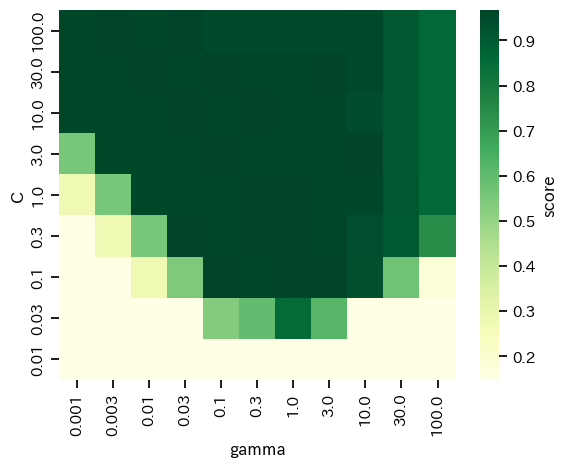

In [234]:
#グリッドサーチの結果をヒートマップで表示

param1_array = gridcv.cv_results_['param_gamma'].data.astype(np.float64)
param2_array = gridcv.cv_results_['param_C'].data.astype(np.float64)
mean_scores = gridcv.cv_results_['mean_test_score']
df_heat = pd.DataFrame(np.vstack([param1_array, param2_array, mean_scores]).T, columns=['gamma', 'C', 'test_score'])

#ピポット化
df_pivot = pd.pivot_table(data=df_heat, values='test_score', columns='gamma', index='C', aggfunc=np.mean)

#上下反転
df_pivot = df_pivot.iloc[::-1]

sns.heatmap(df_pivot, cmap='YlGn', cbar_kws={'label':'score'})

## ランダムサーチ

In [264]:
from sklearn.model_selection import RandomizedSearchCV
# パラメータの密度をグリッドサーチのときより増やす
cv_params = {'gamma': [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100],
             'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
# ランダムサーチのインスタンス作成
randcv = RandomizedSearchCV(model, cv_params, cv=cv,
                            scoring=scoring, random_state=seed,
                            n_iter=50, n_jobs=-1)
# ランダムサーチ実行（学習実行）
randcv.fit(X, y)
# 最適パラメータの表示と保持
best_params = randcv.best_params_
best_score = randcv.best_score_
print(f'最適パラメータ {best_params}\nスコア {best_score}')

最適パラメータ {'gamma': 0.02, 'C': 0.5}
スコア 0.9671255090043998


Text(0, 0.5, 'svm__C')

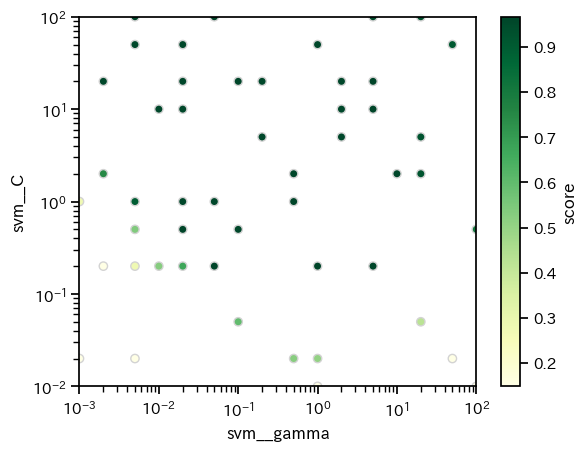

In [265]:
# パラメータと評価指標をndarrayに格納
param1_array = randcv.cv_results_['param_gamma'].data.astype(np.float64)  # パラメータgamma
param2_array = randcv.cv_results_['param_C'].data.astype(np.float64)  # パラメータC
mean_scores = randcv.cv_results_['mean_test_score']  # 評価指標
# 散布図プロット
sc = plt.scatter(param1_array, param2_array, c=mean_scores,
                       cmap='YlGn', edgecolors='lightgrey')
cbar = plt.colorbar(sc)  # カラーバー追加
cbar.set_label('score')  # カラーバーのタイトル
plt.xscale('log')  # 第1軸をlogスケールに
plt.yscale('log')  # 第2軸をlogスケールに
plt.xlim(np.amin(cv_params['gamma']), np.amax(cv_params['gamma']))  # X軸表示範囲をデータ最小値～最大値に
plt.ylim(np.amin(cv_params['C']), np.amax(cv_params['C']))  # Y軸表示範囲をデータ最小値～最大値に
plt.xlabel('svm__gamma')  # X軸ラベル
plt.ylabel('svm__C')  # Y軸ラベル

# ベイズ最適化

In [286]:
from bayes_opt import BayesianOptimization

bayes_params = {'gamma':(0.001, 100),
               'C':(0.01, 100)}

#ベイズ適応後の評価算出
def bayes_evaluate(gamma, C):
    params = {'gamma':gamma,
             'C':C}
    
    #キーワード引数のアンパック
    model.set_params(**params)
    
    #クロスパリデーション
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    val = scores.mean()
    
    return val

bo = BayesianOptimization(bayes_evaluate, bayes_params, random_state=seed)
bo.maximize(init_points=5, n_iter=30, acq='ei')

best_params = bo.max['params']
best_score = bo.max['target']
print(f'最適パラメータ {best_params}\nスコア {best_score}')

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------


/tmp/ipykernel_317/1924751693.py:21: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  bo.maximize(init_points=5, n_iter=30, acq='ei')


| 1         | 0.8615    | 37.46     | 95.07     |
| 2         | 0.8967    | 73.2      | 59.87     |
| 3         | 0.9421    | 15.61     | 15.6      |
| 4         | 0.8692    | 5.818     | 86.62     |
| 5         | 0.8967    | 60.12     | 70.81     |
| 6         | 0.9601    | 44.32     | 0.001     |
| 7         | 0.9521    | 43.27     | 0.1601    |
| 8         | 0.959     | 51.84     | 0.9734    |
| 9         | 0.9551    | 47.69     | 10.64     |
| 10        | 0.9421    | 59.64     | 17.55     |
| 11        | 0.9228    | 45.15     | 25.41     |
| 12        | 0.9216    | 1.435     | 21.66     |
| 13        | 0.9479    | 68.64     | 5.568     |
| 14        | 0.9421    | 76.61     | 16.86     |
| 15        | 0.959     | 82.77     | 1.84      |
| 16        | 0.9551    | 92.94     | 8.873     |
| 17        | 0.9601    | 100.0     | 0.001     |
| 18        | 0.9228    | 100.0     | 23.49     |
| 19        | 0.8615    | 99.88     | 99.07     |
| 20        | 0.9662    | 5.533     | 0.1316    |


Text(0, 0.5, 'C')

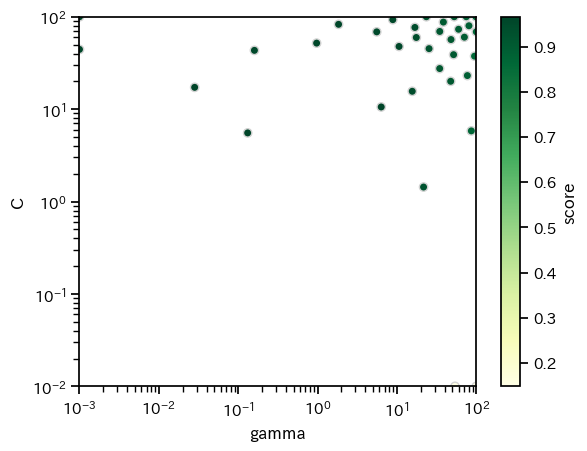

In [288]:
# パラメータと評価指標をndarrayに格納
df_history = pd.DataFrame(bo.space.params, columns=bo.space.keys)  # パラメータ
mean_scores = bo.space.target  # 評価指標
# 散布図プロット
sc = plt.scatter(df_history['gamma'].values, df_history['C'].values, c=mean_scores,
            cmap='YlGn', edgecolors='lightgrey')
cbar = plt.colorbar(sc)  # カラーバー追加
cbar.set_label('score')  # カラーバーのタイトル
plt.xscale('log')  # 第1軸をlogスケールに
plt.yscale('log')  # 第2軸をlogスケールに
plt.xlim(bayes_params['gamma'][0], bayes_params['gamma'][1])  # X軸表示範囲をデータ最小値～最大値に
plt.ylim(bayes_params['C'][0], bayes_params['C'][1])  # Y軸表示範囲をデータ最小値～最大値に
plt.xlabel('gamma')  # X軸ラベル
plt.ylabel('C')  # Y軸ラベル

"""
logスケールではなく、直線スケールだと小数点のスケールより大きなスケールが大きな変化（重要）なため優先される。
このため、偏りが出た。

パラメータを対数化する必要がある。
(0.01~0.1の変化と10~100の変化の重要度が同じになる。)
"""

# ベイズ最適化

In [300]:
#logスケール変化適用
bayes_params = {'gamma': (0.001, 100),
                'C': (0.01, 100)}

bayes_params_log = {k: (np.log10(v[0]), np.log10(v[1])) for k, v in bayes_params.items()}

def bayes_evaluate(gamma, C):
    params = {'gamma': np.power(10, gamma),
             'C': np.power(10, C)}
    
    model.set_params(**params)
    # cross_val_scoreでクロスバリデーション
    scores = cross_val_score(model, X, y, cv=cv,
                             scoring=scoring, n_jobs=-1)
    val = scores.mean()
    return val

bo = BayesianOptimization(bayes_evaluate, bayes_params_log, random_state=seed)
bo.maximize(init_points=5, n_iter=30, acq='ei') 

best_params = {k: np.power(10, v) for k, v in bo.max['params'].items()}
best_score = bo.max['target']
print(f'最適パラメータ {best_params}\nスコア {best_score}')

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------


/tmp/ipykernel_317/3817222384.py:19: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  bo.maximize(init_points=5, n_iter=30, acq='ei')


| 1         | 0.831     | -0.5018   | 1.754     |
| 2         | 0.959     | 0.928     | -0.006708 |
| 3         | 0.1484    | -1.376    | -2.22     |
| 4         | 0.1484    | -1.768    | 1.331     |
| 5         | 0.959     | 0.4045    | 0.5404    |
| 6         | 0.8692    | 1.406     | 1.925     |
| 7         | 0.959     | 2.0       | -2.013    |
| 8         | 0.9519    | 2.0       | 0.3784    |
| 9         | 0.9601    | 2.0       | -3.0      |
| 10        | 0.9671    | 0.8521    | -3.0      |
| 11        | 0.959     | 2.0       | -0.7873   |
| 12        | 0.9601    | 0.9579    | -1.637    |
| 13        | 0.8615    | 0.3832    | 2.0       |
| 14        | 0.9479    | 1.126     | 0.9316    |
| 15        | 0.9601    | 1.343     | -2.472    |
| 16        | 0.9228    | 2.0       | 1.355     |
| 17        | 0.9662    | 1.328     | -1.018    |
| 18        | 0.9662    | 0.4448    | -0.7178   |
| 19        | 0.9601    | 1.314     | -2.981    |
| 20        | 0.9409    | 0.2231    | 1.233     |


Text(0, 0.5, 'C')

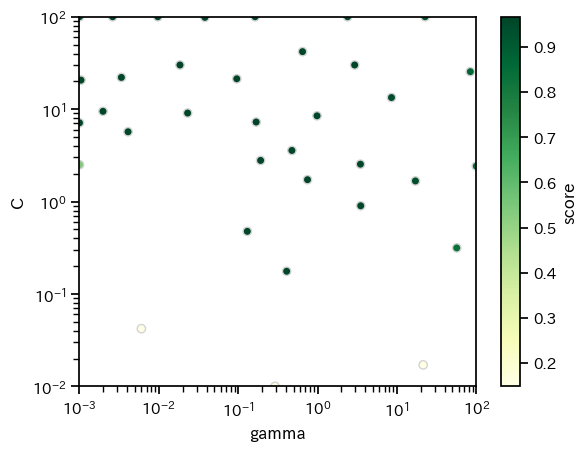

In [298]:
# パラメータと評価指標をndarrayに格納
df_history = pd.DataFrame(np.power(10 ,bo.space.params), columns=bo.space.keys)  # パラメータ
mean_scores = bo.space.target  # 評価指標
# 散布図プロット
sc = plt.scatter(df_history['gamma'].values, df_history['C'].values, c=mean_scores,
            cmap='YlGn', edgecolors='lightgrey')
cbar = plt.colorbar(sc)  # カラーバー追加
cbar.set_label('score')  # カラーバーのタイトル
plt.xscale('log')  # 第1軸をlogスケールに
plt.yscale('log')  # 第2軸をlogスケールに
plt.xlim(bayes_params['gamma'][0], bayes_params['gamma'][1])  # X軸表示範囲をデータ最小値～最大値に
plt.ylim(bayes_params['C'][0], bayes_params['C'][1])  # Y軸表示範囲をデータ最小値～最大値に
plt.xlabel('gamma')  # X軸ラベル
plt.ylabel('C')  # Y軸ラベル

"""
偏りが改善された。

"""

## ベイズ最適化（Optuna）の場合

In [302]:
!pip install  optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 908.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 848.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 814.8 kB/s eta 0:00:000:00:01


In [333]:
import optuna

def bayes_objective(trial):
    params = {
        "gamma": trial.suggest_float("gamma", 0.001, 100, log=True),
        "C": trial.suggest_float("C", 0.01, 100, log=True)
    }
    
    model.set_params(**params)
    scores = cross_val_score(model, X, y, cv=cv,
                             scoring=scoring, n_jobs=-1)
    val = scores.mean()
    return val    

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=seed))
study.optimize(bayes_objective, n_trials=40)

best_params = study.best_trial.params
best_score = study.best_trial.value
print(f'最適パラメータ {best_params}\nスコア {best_score}')

"""
optunaの利点

豊富なAPIが多い
・trial.suggest_floatメソッドの引数に"log=True"をして、logスケール探索
・整数型のパラメータならtrial.suggest_int
・文字列型（カテゴリカル）ならtrial.suggest_categorical

・クロスバリデーションが含まれているOptunaSearchCVがある


"""

[I 2023-11-18 09:40:59,636] A new study created in memory with name: no-name-24b2fb31-4f2f-4252-985d-2470ff953c44
[I 2023-11-18 09:40:59,702] Trial 0 finished with value: 0.9662162162162162 and parameters: {'gamma': 0.0745934328572655, 'C': 63.512210106407046}. Best is trial 0 with value: 0.9662162162162162.
[I 2023-11-18 09:40:59,738] Trial 1 finished with value: 0.9590477574348543 and parameters: {'gamma': 4.5705630998014515, 'C': 2.481040974867813}. Best is trial 0 with value: 0.9662162162162162.
[I 2023-11-18 09:40:59,770] Trial 2 finished with value: 0.14841948175281508 and parameters: {'gamma': 0.006026889128682512, 'C': 0.042070539502879395}. Best is trial 0 with value: 0.9662162162162162.
[I 2023-11-18 09:40:59,808] Trial 3 finished with value: 0.9600924970378014 and parameters: {'gamma': 0.0019517224641449498, 'C': 29.154431891537552}. Best is trial 0 with value: 0.9662162162162162.
[I 2023-11-18 09:40:59,831] Trial 4 finished with value: 0.9590477574348543 and parameters: {'g

最適パラメータ {'gamma': 0.0745934328572655, 'C': 63.512210106407046}
スコア 0.9662162162162162


'\noptunaの利点\n\n豊富なAPIが多い\n・trial.suggest_floatメソッドの引数に"log=True"をして、logスケール探索\n・整数型のパラメータならtrial.suggest_int\n・文字列型（カテゴリカル）ならtrial.suggest_categorical\n\n・クロスバリデーションが含まれているOptunaSearchCVがある\n\n\n'

Text(0, 0.5, 'C')

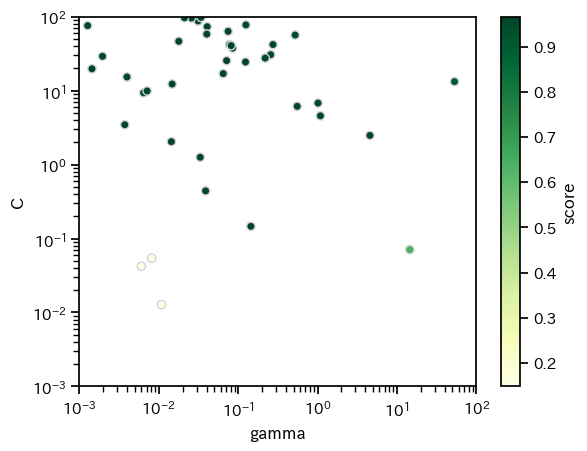

In [334]:
# パラメータと評価指標をndarrayに格納
param1_array = [trial.params['gamma'] for trial in study.trials]  # パラメータgamma
param2_array = [trial.params['C'] for trial in study.trials]  # パラメータC
mean_scores = [trial.value for trial in study.trials]  # 評価指標
# 散布図プロット
sc = plt.scatter(param1_array, param2_array, c=mean_scores,
            cmap='YlGn', edgecolors='lightgrey')
cbar = plt.colorbar(sc)  # カラーバー追加
cbar.set_label('score')  # カラーバーのタイトル
plt.xscale('log')  # 第1軸をlogスケールに
plt.yscale('log')  # 第2軸をlogスケールに
plt.xlim(0.001, 100)  # X軸表示範囲をデータ最小値～最大値に
plt.ylim(0.001, 100)  # Y軸表示範囲をデータ最小値～最大値に
plt.xlabel('gamma')  # X軸ラベル
plt.ylabel('C')  # Y軸ラベル

## 学習・検証曲線の確認

In [ ]:
"""
Optunaのパラメータ（gamma=0.0746, C=56.7）を描写
"""

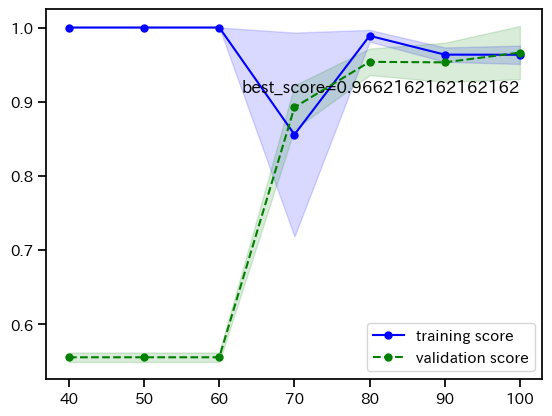

In [335]:
#学習曲線
"""
目的の性能を達成しているか？
過学習をしていないか？

"""
from sklearn.model_selection import learning_curve

model.set_params(**best_params)

train_sizes, train_scores, valid_scores = learning_curve(estimator=model,
                                                         X=X, y=y,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         cv=cv, scoring=scoring, n_jobs=-1)

# 学習データ指標の平均±標準偏差を計算
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
train_center = train_mean
train_high = train_mean + train_std
train_low = train_mean - train_std

# 検証データ指標の平均±標準偏差を計算
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)
valid_center = valid_mean
valid_high = valid_mean + valid_std
valid_low = valid_mean - valid_std


# training_scoresをプロット
plt.plot(train_sizes, train_center, color='blue', marker='o', markersize=5, label='training score')
plt.fill_between(train_sizes, train_high, train_low, alpha=0.15, color='blue')
# validation_scoresをプロット
plt.plot(train_sizes, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
plt.fill_between(train_sizes, valid_high, valid_low, alpha=0.15, color='green')

best_score = valid_center[len(valid_center) - 1]
plt.text(np.amax(train_sizes), valid_low[len(valid_low) - 1], f'best_score={best_score}',
                color='black', verticalalignment='top', horizontalalignment='right')
plt.legend()

In [ ]:
#検証曲線

"""
・性能の最大値を捉えられているか？
・過学習をしていないか

"""

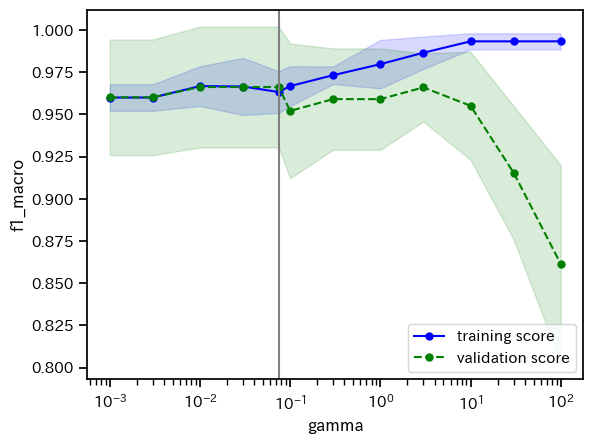

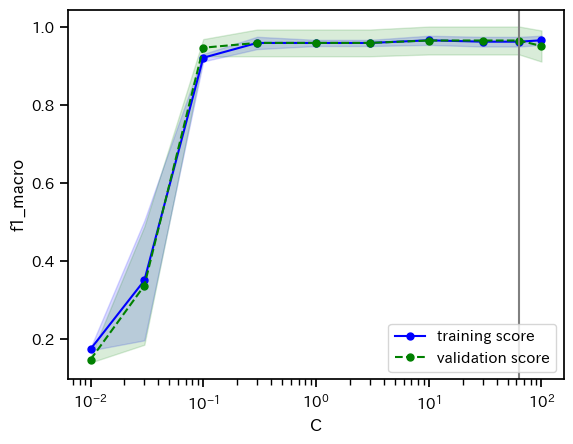

In [353]:
valid_curve_params = {'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
                      'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]}

for k, v in valid_curve_params.items(): 
    if best_params[k] not in v:
        v.append(best_params[k])
        v.sort()
for i, (k, v) in enumerate(valid_curve_params.items()):
    model.set_params(**best_params)
    
    #検証曲線
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    
    #学習データのプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # 最適パラメータを縦線表示
    plt.axvline(x=best_params[k], color='gray')
    # スケールを'log'に（線形なパラメータは'linear'にするので注意）
    plt.xscale('log')
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()

# パイプライン処理（標準化+SVM）による分類

In [363]:
df_athelete = pd.read_csv('csv/nba_nfl_2.csv')
df_athelete.head()

,name,league,position,height,weight
0,Wilt Chambelain,NBA,C,215.9,113.4
1,Bill Russel,NBA,C,208.3,97.5
2,Kareem Abdul-Jabbar,NBA,C,218.4,102.1
3,Elvin Hayes,NBA,PF,205.7,106.6
4,Moses Malone,NBA,C,208.3,97.5


<AxesSubplot:xlabel='height', ylabel='weight'>

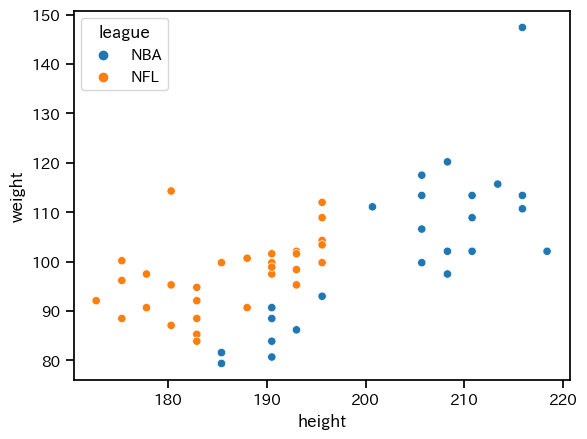

In [365]:
sns.scatterplot(x='height', y='weight', data=df_athelete, hue='league')

In [ ]:
"""
チューニング前のモデル化

・標準化(StandardScaler)を使用するため、Pipelineを使用
・n=40と少ないので、Stratified K-Foldでクロスバリデーション
・評価指標neg_log_lossの計算のため、SVCのprobalility=Trueを指定
　→2クラス分類、不均衡データなしのため

"""

In [374]:
from seaborn_analyzer import classplot
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#乱数
seed = 42

model = Pipeline([('scaler', StandardScaler()), ('svm', SVC(probability=True, random_state=seed))])


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

## チューニング開始

### 手順１：最大化したい評価指標の定義

In [375]:
from sklearn.model_selection import cross_val_score

X = df_athelete[['height', 'weight']].values
y = df_athelete['league']
scoring = 'neg_log_loss'

scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

print(f'scores={scores}')
print(f'average_score={np.mean(scores)}')

scores=[-0.17737566 -0.1880831  -0.21874771]
average_score=-0.19473549413901467


In [376]:
#デフォルトのgamma値
print(f'gamma = {1 /(X.shape[1] * StandardScaler().fit_transform(X).var())}')

gamma = 0.5000000000000001


### 手順2:パラメータ種類と範囲の選択

In [ ]:
"""
適当な初期範囲を定めて検証曲線をプロットし、調整する
パイプラインを使用している場合、パラメータ名を"学習器名＿＿パラメータ名"とする必要がある。

"""

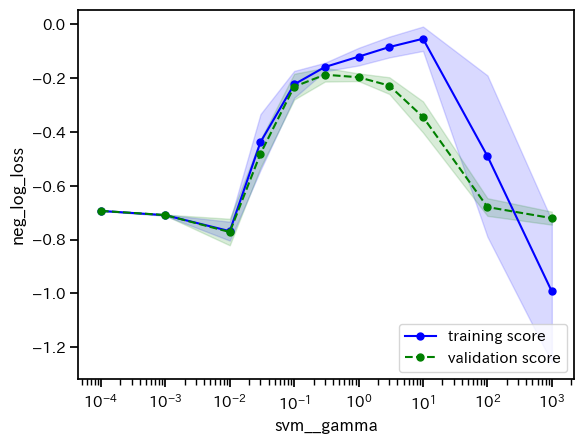

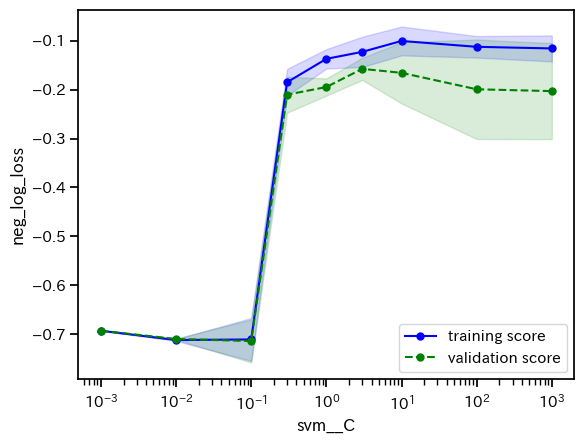

In [382]:
from sklearn.model_selection import validation_curve

cv_params = {'svm__gamma': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100, 1000],
             'svm__C': [0.001, 0.01, 0.1, 0.3, 1, 3, 10, 100, 1000]}

for i, (k, v) in enumerate(cv_params.items()):
    train_scores, valid_scores = validation_curve(estimator=model, X=X, y=y, param_name=k, param_range=v, cv=cv, scoring=scoring, n_jobs=-1)
    
    # 学習データに対するスコアの平均±標準偏差を算出-----以下コピペー------
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールを'log'に（線形なパラメータは'linear'にするので注意）
    plt.xscale('log')
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()
"""
範囲を少し広めに取って

'gamma':0.01~100
'C'    :0.1~1000

"""

### 手順3&4 パラメータ選択&クロスバリデーション

###　グリッドサーチ

In [383]:
from sklearn.model_selection import GridSearchCV

# 最終的なパラメータ範囲
cv_params = {'svm__gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
             'svm__C': [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]}

gridcv = GridSearchCV(model, cv_params, cv=cv, scoring=scoring, n_jobs=-1)
gridcv.fit(X, y)

best_params = gridcv.best_params_
best_score = gridcv.best_score_
print(f'最適パラメータ {best_params}\nスコア {best_score}')

最適パラメータ {'svm__C': 10, 'svm__gamma': 0.3}
スコア -0.17112358617348047


<AxesSubplot:xlabel='svm__gamma', ylabel='svm__C'>

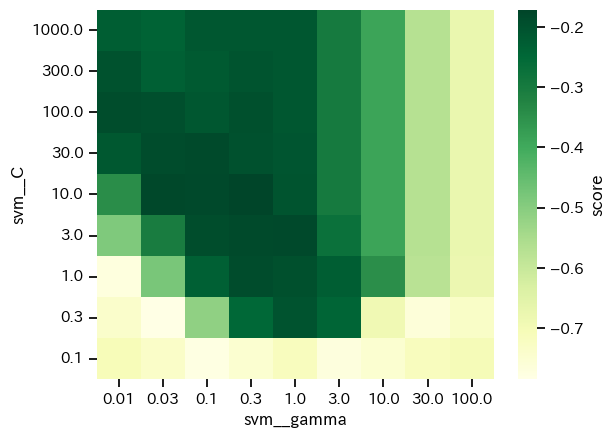

In [384]:
param1_array = gridcv.cv_results_['param_svm__gamma'].data.astype(np.float64)  # パラメータgamma
param2_array = gridcv.cv_results_['param_svm__C'].data.astype(np.float64)  # パラメータC
mean_scores = gridcv.cv_results_['mean_test_score']  # 評価指標
df_heat = pd.DataFrame(np.vstack([param1_array, param2_array, mean_scores]).T,
                       columns=['svm__gamma', 'svm__C', 'test_score'])
# グリッドデータをピボット化
df_pivot = pd.pivot_table(data=df_heat, values='test_score', 
                          columns='svm__gamma', index='svm__C', aggfunc=np.mean)
# 上下軸を反転（元々は上方向が小となっているため）
df_pivot = df_pivot.iloc[::-1]
# ヒートマップをプロット
sns.heatmap(df_pivot, cmap='YlGn', cbar_kws={'label': 'score'})

### ランダムサーチ

In [395]:
from sklearn.model_selection import RandomizedSearchCV

cv_params = {'svm__gamma': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100],
             'svm__C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}
# ランダムサーチのインスタンス作成
randcv = RandomizedSearchCV(model, cv_params, cv=cv,
                            scoring=scoring, random_state=seed,
                            n_iter=50, n_jobs=-1)
# ランダムサーチ実行（学習実行）
randcv.fit(X, y)
# 最適パラメータの表示と保持
best_params = randcv.best_params_
best_score = randcv.best_score_
print(f'最適パラメータ {best_params}\nスコア {best_score}')

最適パラメータ {'svm__gamma': 0.2, 'svm__C': 10}
スコア -0.17418521473927107


Text(0, 0.5, 'svm__C')

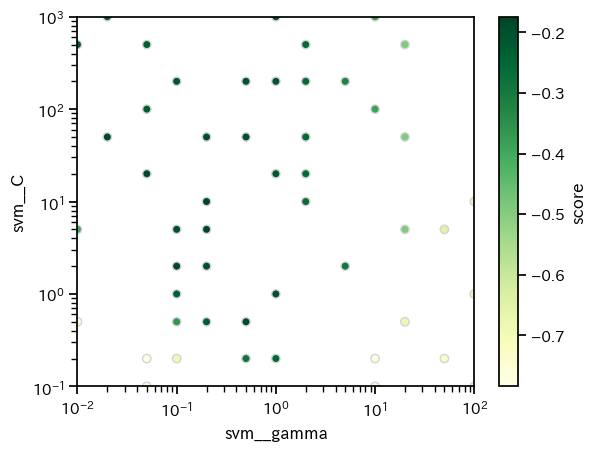

In [396]:
# パラメータと評価指標をndarrayに格納
param1_array = randcv.cv_results_['param_svm__gamma'].data.astype(np.float64)  # パラメータgamma
param2_array = randcv.cv_results_['param_svm__C'].data.astype(np.float64)  # パラメータC
mean_scores = randcv.cv_results_['mean_test_score']  # 評価指標
# 散布図プロット
sc = plt.scatter(param1_array, param2_array, c=mean_scores,
                       cmap='YlGn', edgecolors='lightgrey')
cbar = plt.colorbar(sc)  # カラーバー追加
cbar.set_label('score')  # カラーバーのタイトル
plt.xscale('log')  # 第1軸をlogスケールに
plt.yscale('log')  # 第2軸をlogスケールに
plt.xlim(np.amin(cv_params['svm__gamma']), np.amax(cv_params['svm__gamma']))  # X軸表示範囲をデータ最小値～最大値に
plt.ylim(np.amin(cv_params['svm__C']), np.amax(cv_params['svm__C']))  # Y軸表示範囲をデータ最小値～最大値に
plt.xlabel('svm__gamma')  # X軸ラベル
plt.ylabel('svm__C')  # Y軸ラベル

### ベイズ最適化の場合

In [398]:
from bayes_opt import BayesianOptimization
# パラメータ範囲（Tupleで範囲選択）
bayes_params = {'svm__gamma': (0.01, 100),
                'svm__C': (0.1, 1000)}
# パラメータ範囲を対数化
bayes_params_log = {k: (np.log10(v[0]), np.log10(v[1])) for k, v in bayes_params.items()}
# ベイズ最適化時の評価指標算出メソッド
def bayes_evaluate(svm__gamma, svm__C):
    # 最適化対象のパラメータ
    params = {'svm__gamma': np.power(10 ,svm__gamma),
              'svm__C': np.power(10, svm__C)}
    # モデルにパラメータ適用
    model.set_params(**params)
    # cross_val_scoreでクロスバリデーション
    scores = cross_val_score(model, X, y, cv=cv,
                             scoring=scoring, n_jobs=-1)
    val = scores.mean()
    return val

# ベイズ最適化を実行
bo = BayesianOptimization(bayes_evaluate, bayes_params_log, random_state=seed)
bo.maximize(init_points=5, n_iter=40, acq='ei')
# 最適パラメータの表示と保持
best_params = {k: np.power(10, v) for k, v in bo.max['params'].items()}
best_score = bo.max['target']
print(f'最適パラメータ {best_params}\nスコア {best_score}')

|   iter    |  target   |  svm__C   | svm__g... |
-------------------------------------------------


/tmp/ipykernel_317/404602900.py:22: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  bo.maximize(init_points=5, n_iter=40, acq='ei')


| 1         | -0.6642   | 0.4982    | 1.803     |
| 2         | -0.2845   | 1.928     | 0.3946    |
| 3         | -0.6442   | -0.3759   | -1.376    |
| 4         | -0.7341   | -0.7677   | 1.465     |
| 5         | -0.346    | 1.404     | 0.8323    |
| 6         | -0.5678   | 3.0       | 1.472     |
| 7         | -0.2104   | 2.031     | -0.829    |
| 8         | -0.2284   | 3.0       | -2.0      |
| 9         | -0.2029   | 3.0       | -0.7884   |
| 10        | -0.2228   | 1.854     | -2.0      |
| 11        | -0.2133   | 2.515     | -1.419    |
| 12        | -0.1956   | 1.288     | -0.3415   |
| 13        | -0.1798   | 1.334     | -1.193    |
| 14        | -0.2849   | 1.125     | -1.991    |
| 15        | -0.1932   | 1.443     | -0.8057   |
| 16        | -0.1862   | 1.702     | -1.416    |
| 17        | -0.2052   | 3.0       | -0.1817   |
| 18        | -0.168    | 0.8624    | -0.5486   |
| 19        | -0.168    | 0.6511    | -0.03413  |
| 20        | -0.1585   | 0.8737    | -0.1732   |


Text(0, 0.5, 'svm__C')

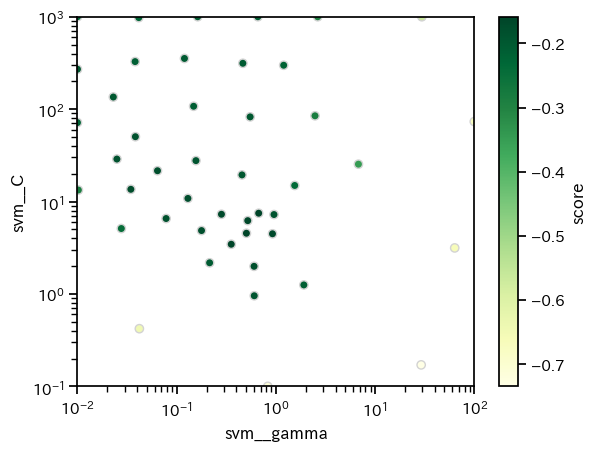

In [399]:
# パラメータと評価指標をndarrayに格納
df_history = pd.DataFrame(np.power(10 ,bo.space.params), columns=bo.space.keys)  # パラメータ
mean_scores = bo.space.target  # 評価指標
# 散布図プロット
sc = plt.scatter(df_history['svm__gamma'].values, df_history['svm__C'].values, c=mean_scores,
                 cmap='YlGn', edgecolors='lightgrey')
cbar = plt.colorbar(sc)  # カラーバー追加
cbar.set_label('score')  # カラーバーのタイトル
plt.xscale('log')  # 第1軸をlogスケールに
plt.yscale('log')  # 第2軸をlogスケールに
plt.xlim(bayes_params['svm__gamma'][0], bayes_params['svm__gamma'][1])  # X軸表示範囲をデータ最小値～最大値に
plt.ylim(bayes_params['svm__C'][0], bayes_params['svm__C'][1])  # Y軸表示範囲をデータ最小値～最大値に
plt.xlabel('svm__gamma')  # X軸ラベル
plt.ylabel('svm__C')  # Y軸ラベル

### ベイズ最適化（optuna）の場合

In [406]:
import optuna
# ベイズ最適化時の評価指標算出メソッド
def bayes_objective(trial):
    params = {
        "svm__gamma": trial.suggest_float("svm__gamma", 0.01, 100, log=True),
        "svm__C": trial.suggest_float("svm__C", 0.1, 1000, log=True)
    }
    # モデルにパラメータ適用
    model.set_params(**params)
    # cross_val_scoreでクロスバリデーション
    scores = cross_val_score(model, X, y, cv=cv,
                             scoring=scoring, n_jobs=-1)
    val = scores.mean()
    return val

# ベイズ最適化を実行
study = optuna.create_study(direction="maximize",
                            sampler=optuna.samplers.TPESampler(seed=seed))
study.optimize(bayes_objective, n_trials=40)

# 最適パラメータの表示と保持
best_params = study.best_trial.params
best_score = study.best_trial.value
print(f'最適パラメータ {best_params}\nスコア {best_score}')


[I 2023-11-18 13:05:31,798] A new study created in memory with name: no-name-3aaa0eed-d6ca-493a-9419-0fcbd927feb3
[I 2023-11-18 13:05:33,635] Trial 0 finished with value: -0.20979408512464223 and parameters: {'svm__gamma': 0.31489116479568624, 'svm__C': 635.1221010640695}. Best is trial 0 with value: -0.20979408512464223.
[I 2023-11-18 13:05:34,696] Trial 1 finished with value: -0.3681204598163997 and parameters: {'svm__gamma': 8.471801418819979, 'svm__C': 24.81040974867808}. Best is trial 0 with value: -0.20979408512464223.
[I 2023-11-18 13:05:34,730] Trial 2 finished with value: -0.6442123913236338 and parameters: {'svm__gamma': 0.04207988669606638, 'svm__C': 0.42070539502879356}. Best is trial 0 with value: -0.20979408512464223.
[I 2023-11-18 13:05:34,765] Trial 3 finished with value: -0.22252370243408928 and parameters: {'svm__gamma': 0.017073967431528128, 'svm__C': 291.5443189153751}. Best is trial 0 with value: -0.20979408512464223.
[I 2023-11-18 13:05:34,807] Trial 4 finished wi

最適パラメータ {'svm__gamma': 0.3914155606878007, 'svm__C': 4.888899219037506}
スコア -0.15821590853290188


Text(0, 0.5, 'svm__C')

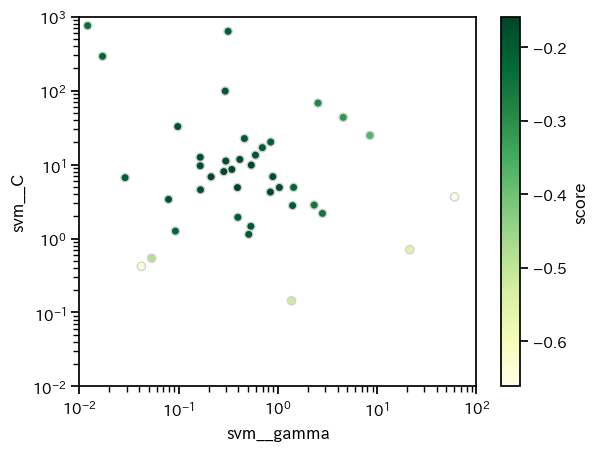

In [405]:
# %% Optunaの評価指標を可視化（散布図）
# パラメータと評価指標をndarrayに格納
param1_array = [trial.params['svm__gamma'] for trial in study.trials]  # パラメータgamma
param2_array = [trial.params['svm__C'] for trial in study.trials]  # パラメータC
mean_scores = [trial.value for trial in study.trials]  # 評価指標
# 散布図プロット
sc = plt.scatter(param1_array, param2_array, c=mean_scores,
                 cmap='YlGn', edgecolors='lightgrey')
cbar = plt.colorbar(sc)  # カラーバー追加
cbar.set_label('score')  # カラーバーのタイトル
plt.xscale('log')  # 第1軸をlogスケールに
plt.yscale('log')  # 第2軸をlogスケールに
plt.xlim(0.01, 100)  # X軸表示範囲をデータ最小値～最大値に
plt.ylim(0.01, 1000)  # Y軸表示範囲をデータ最小値～最大値に
plt.xlabel('svm__gamma')  # X軸ラベル
plt.ylabel('svm__C')  # Y軸ラベル

## 手順5　学習・検証曲線の確認

### 学習曲線

In [407]:
from sklearn.model_selection import learning_curve

model.set_params(**best_params)
scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
print(scores.mean())

# 学習曲線の取得
train_sizes, train_scores, valid_scores = learning_curve(estimator=model,
                                                         X=X, y=y,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         cv=cv, scoring=scoring, n_jobs=-1)

-0.15821590853290188


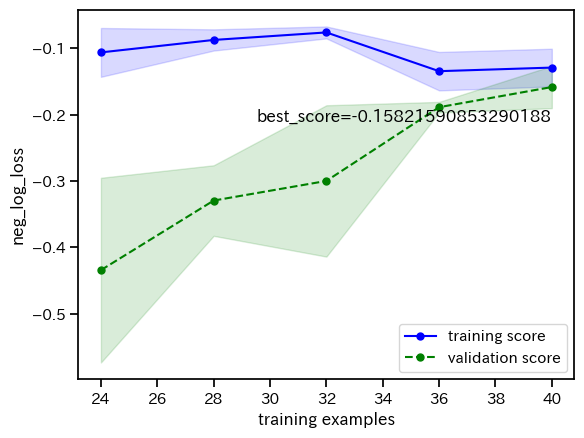

In [424]:
# 学習データ指標の平均±標準偏差を計算
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
train_center = train_mean
train_high = train_mean + train_std
train_low = train_mean - train_std
# 検証データ指標の平均±標準偏差を計算
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)
valid_center = valid_mean
valid_high = valid_mean + valid_std
valid_low = valid_mean - valid_std

# training_scoresをプロット
plt.plot(train_sizes, train_center, color='blue', marker='o', markersize=5, label='training score')
plt.fill_between(train_sizes, train_high, train_low, alpha=0.15, color='blue')
# validation_scoresをプロット
plt.plot(train_sizes, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
plt.fill_between(train_sizes, valid_high, valid_low, alpha=0.15, color='green')
# 最高スコアの表示
best_score = valid_center[len(valid_center) - 1]
plt.text(np.amax(train_sizes), valid_low[len(valid_low) - 1], f'best_score={best_score}',
                color='black', verticalalignment='top', horizontalalignment='right')
# 軸ラベルおよび凡例の指定
plt.xlabel('training examples')  # 学習サンプル数を横軸ラベルに
plt.ylabel(scoring)  # スコア名を縦軸ラベルに
plt.legend(loc='lower right')  # 凡例

### 検証曲線

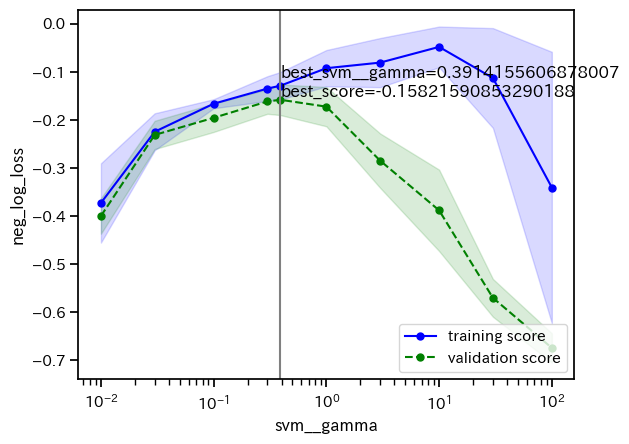

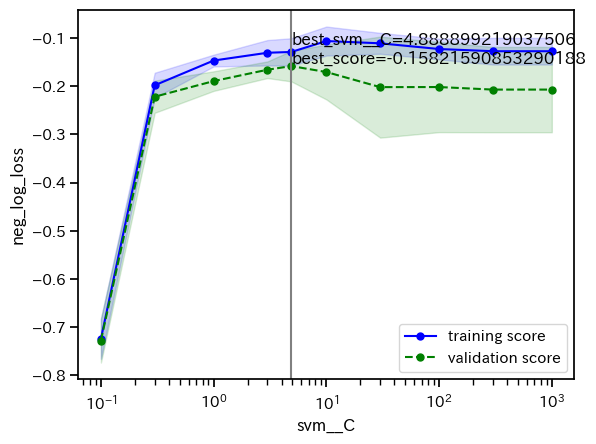

In [425]:
# 検証曲線描画対象パラメータ
valid_curve_params = {'svm__gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
                      'svm__C': [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]}
# 最適パラメータを上記描画対象に追加
for k, v in valid_curve_params.items():
    if best_params[k] not in v:
        v.append(best_params[k])
        v.sort()
for i, (k, v) in enumerate(valid_curve_params.items()):
    # モデルに最適パラメータを適用
    model.set_params(**best_params)
    # 検証曲線を描画
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # 最適パラメータを縦線表示
    plt.axvline(x=best_params[k], color='gray')
    best_index = np.where(np.array(v)==best_params[k])
    best_score = valid_center[best_index][0]
    plt.text(best_params[k], np.amax(valid_center), f'best_{k}={best_params[k]}\nbest_score={best_score}',
                    color='black', verticalalignment='bottom', horizontalalignment='left')
    # スケールを'log'に（線形なパラメータは'linear'にするので注意）
    plt.xscale('log')
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()
